# Agricultral producitivity analysis.

In [29]:
# reading data on google drive
from google.colab import drive
# Mount your Google Drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

# Load CSV file from Google Drive
file_path = '/content/drive/MyDrive/other/data/Data for MSC Thesis/eth_householdgeovariables_y5.csv'
df = pd.read_csv(file_path)

print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        household_id  dist_road  dist_market  dist_border  dist_popcenter  \
0  20101010100104011        7.7   162.300003    82.900002             0.4   
1  20101010100104022        7.7   162.300003    82.900002             0.4   
2  20101010100104033        7.7   162.300003    82.900002             0.4   
3  20101010100104044        7.7   162.300003    82.900002             0.4   
4  20101010100104055        7.7   162.300003    82.900002             0.4   

   dist_admhq  af_bio_1_x  af_bio_8_x  af_bio_12_x  af_bio_13_x  ...  \
0         0.0         283         307          184           47  ...   
1         0.0         283         307          184           47  ...   
2         0.0         283         307          184           47  ...   
3         0.0         283         307          184           47  ...   
4         0.0         283         307          1

In [30]:
# ------------------------------
# DATA EXPLORATION: NULL AND OUTLIER PERCENTAGE
# ------------------------------

# ------------------------------
# Step 1: Dataset Overview
# ------------------------------
print("----- Dataset Info -----")
print(df.info())

print("\n----- Dataset Shape -----")
print(df.shape)

print("\n----- Statistical Summary -----")
print(df.describe())

# ------------------------------
# Step 2: Missing Values by Percentage
# ------------------------------
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("\n----- Missing Values Summary -----")
print(missing_df.sort_values(by='Percentage', ascending=False))

# ------------------------------
# Step 3: Outlier Detection by Percentage (Numeric Columns Only)
# ------------------------------
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

outlier_summary = []
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(df)) * 100

    outlier_summary.append([col, outlier_count, outlier_percent])

outlier_df = pd.DataFrame(outlier_summary, columns=['Column', 'Outlier Count', 'Outlier %'])
print("\n----- Outlier Summary by Percentage -----")
print(outlier_df.sort_values(by='Outlier %', ascending=False))

----- Dataset Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4890 entries, 0 to 4889
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   household_id       4890 non-null   int64  
 1   dist_road          4890 non-null   float64
 2   dist_market        4890 non-null   float64
 3   dist_border        4890 non-null   float64
 4   dist_popcenter     4890 non-null   float64
 5   dist_admhq         4890 non-null   float64
 6   af_bio_1_x         4890 non-null   int64  
 7   af_bio_8_x         4890 non-null   int64  
 8   af_bio_12_x        4890 non-null   int64  
 9   af_bio_13_x        4890 non-null   int64  
 10  af_bio_16_x        4890 non-null   int64  
 11  afmnslp_pct        4890 non-null   int64  
 12  srtm_1k            4890 non-null   int64  
 13  popdensity         4890 non-null   int64  
 14  cropshare          4890 non-null   int64  
 15  sq1                4890 non-null   int64  
 16 

In [31]:
#----------------------------------------
#1 Drop columns with more than 40% missing
#----------------------------------------
missing_threshold = 0.4
cols_to_drop = df.columns[df.isnull().mean() > missing_threshold]

print("Dropping columns:", cols_to_drop.tolist())
df = df.drop(columns=cols_to_drop)

# 2. Remove spatial leakage
df = df.drop(columns=['lat_dd_mod', 'lon_dd_mod'], errors='ignore')

# 3. Winsorize numeric features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    if col not in ['household_id', 'AI_pca1']:
        lower = df[col].quantile(0.01)
        upper = df[col].quantile(0.99)
        df[col] = df[col].clip(lower, upper)

Dropping columns: ['c2_eviarea_avg', 'c2_evimax_avg', 'c2_grn_avg', 'c2_sen_avg', 'c2_h2021_eviarea', 'c2_h2021_evimax', 'c2_h2021_grn', 'c2_h2021_sen']



COMPREHENSIVE CORRELATION AND VIF ANALYSIS

1. PREPARING ALL DATA COLUMNS
----------------------------------------
Total numerical columns in df: 40
Including target column: evimax_avg

Analyzing 40 columns total:

2. CORRELATION HEATMAP (WITH VALUES)
----------------------------------------


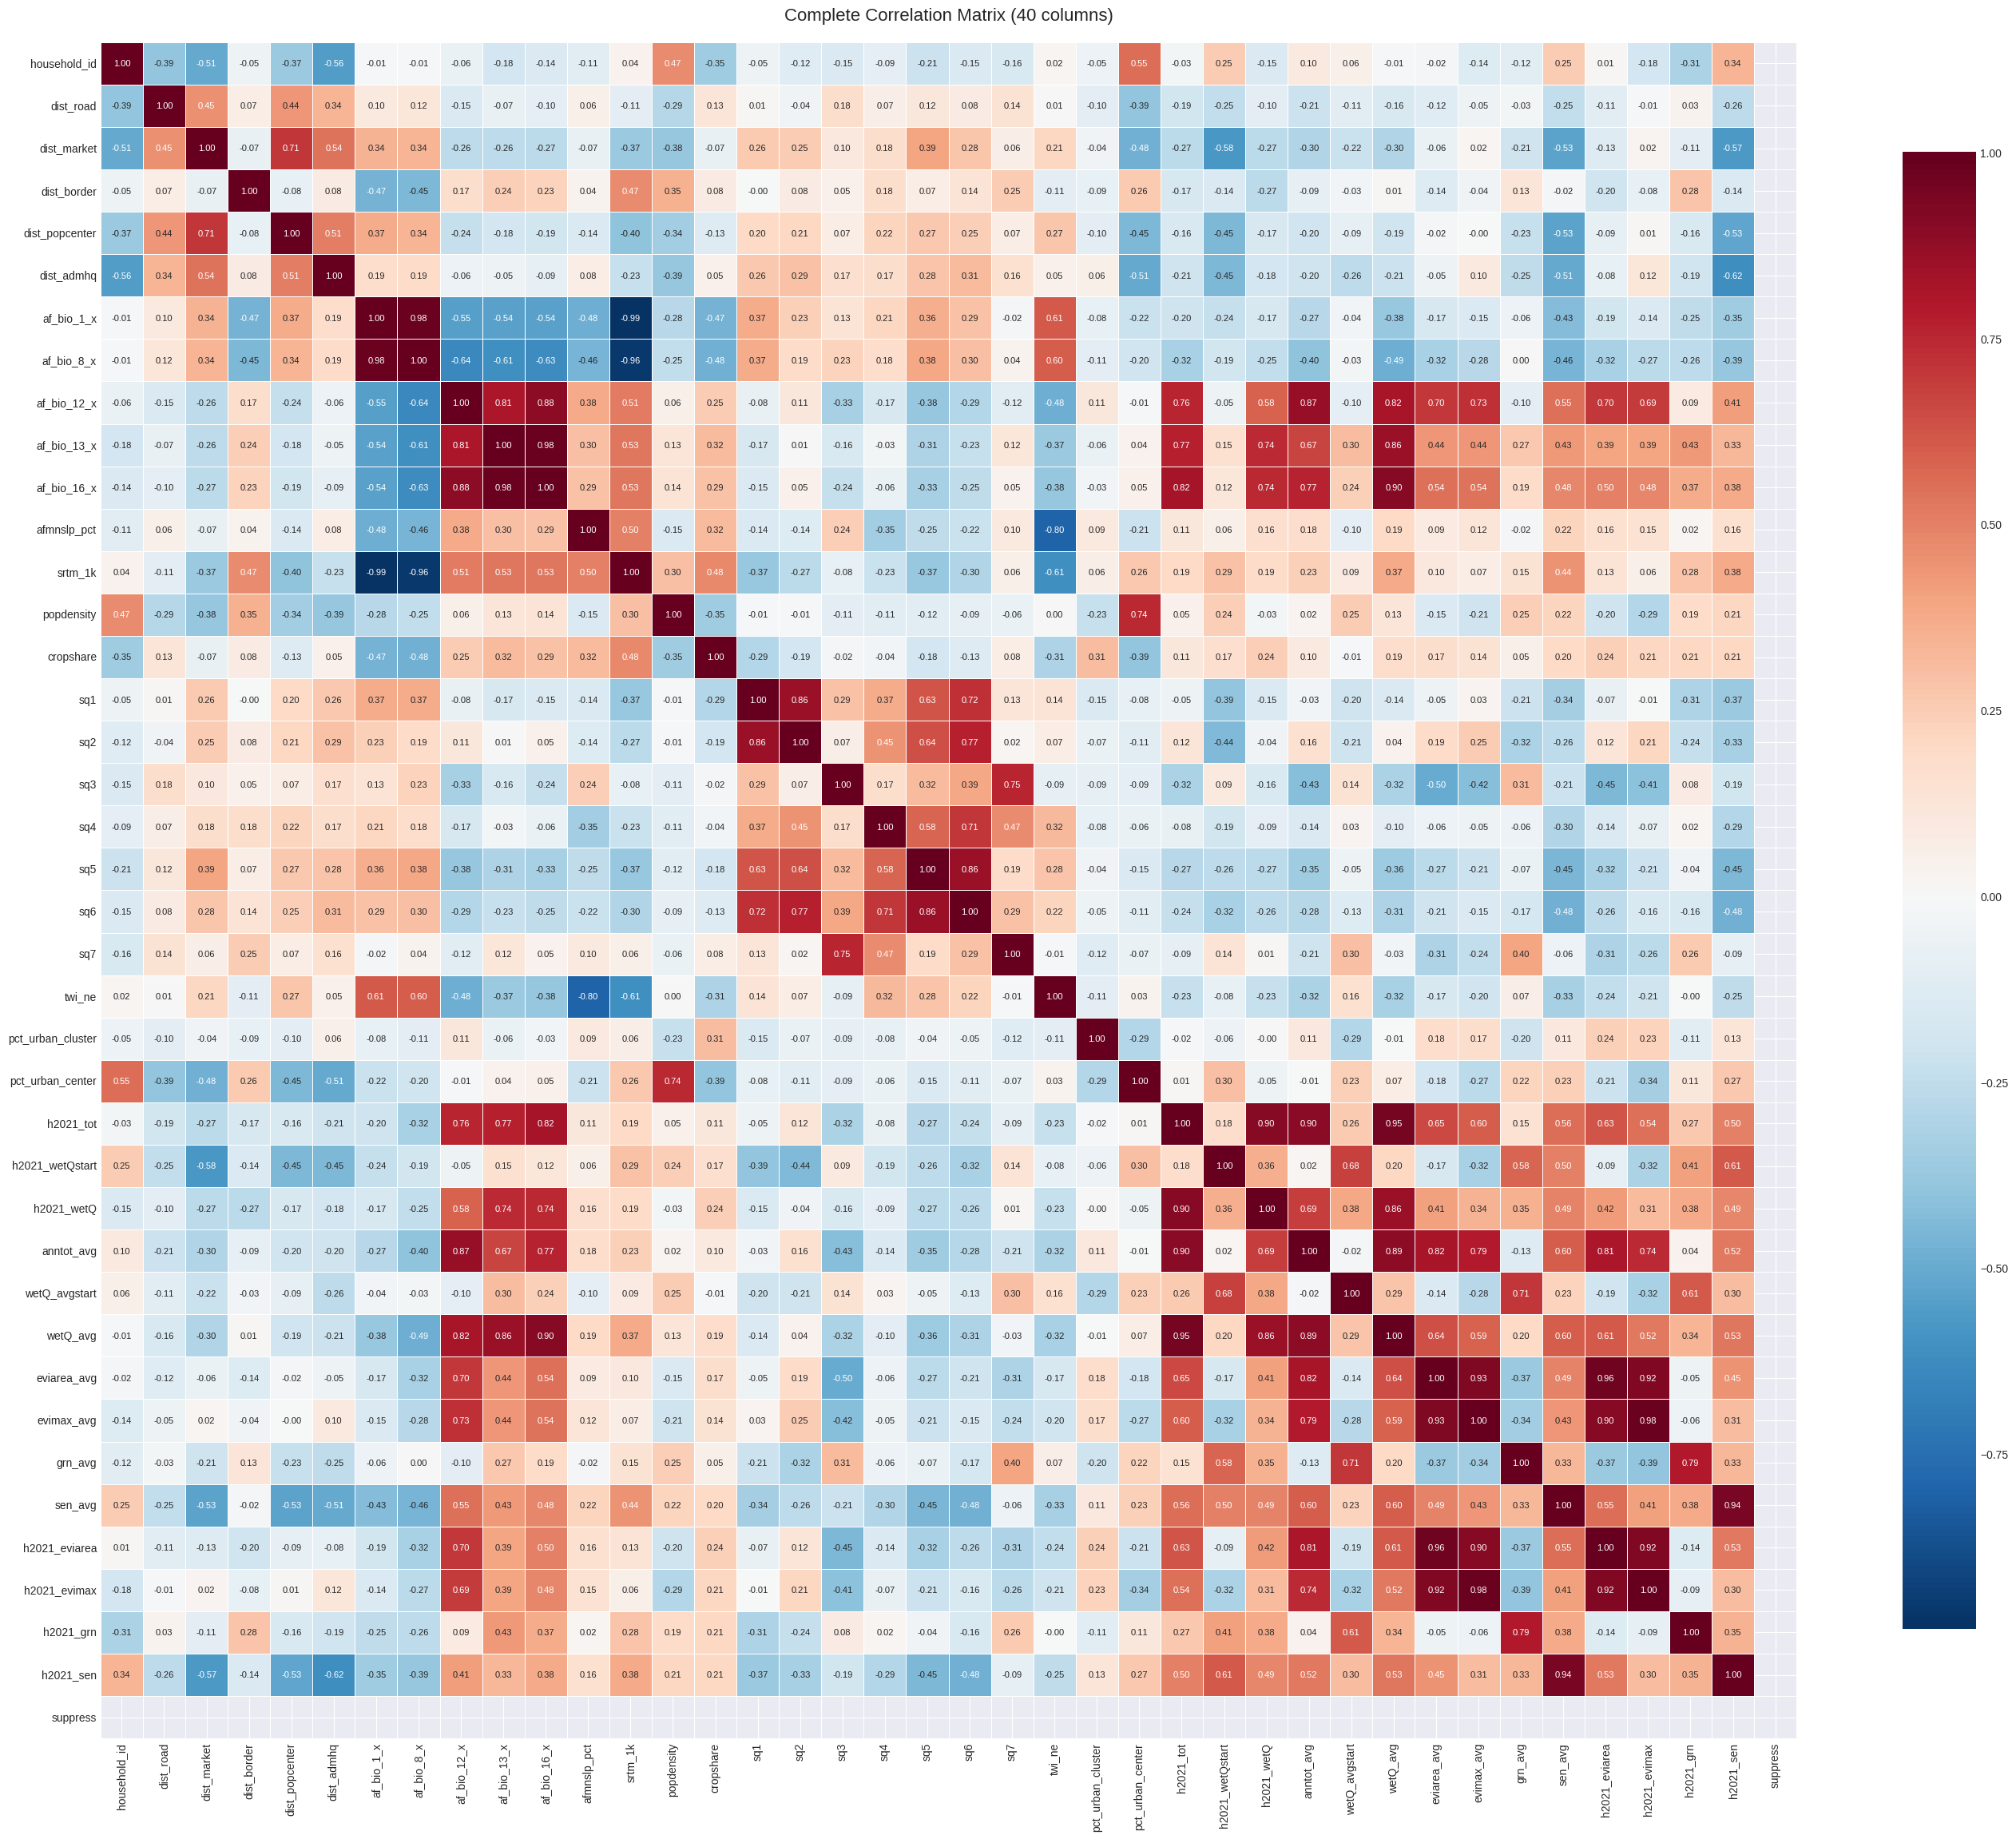


3. TARGET CORRELATION ANALYSIS
----------------------------------------

4. VIF ANALYSIS FOR ALL NUMERICAL FEATURES
----------------------------------------
Calculating VIF for 39 features...

VIF RESULTS SUMMARY:
------------------------------------------------------------
Feature                        VIF      Status      
------------------------------------------------------------
🔴 h2021_tot                       26.10 HIGH VIF    
🔴 wetQ_avg                        22.38 HIGH VIF    
🔴 af_bio_13_x                     19.88 HIGH VIF    
🔴 anntot_avg                      13.21 HIGH VIF    
🔴 af_bio_12_x                     10.34 HIGH VIF    
🟡 af_bio_16_x                      8.09 MODERATE    
🟡 household_id                     5.21 MODERATE    
🟢 h2021_eviarea                    4.48 OK          
🟢 h2021_evimax                     4.27 OK          
🟢 eviarea_avg                      3.83 OK          
🟢 af_bio_1_x                       2.82 OK          
🟢 pct_urban_center         

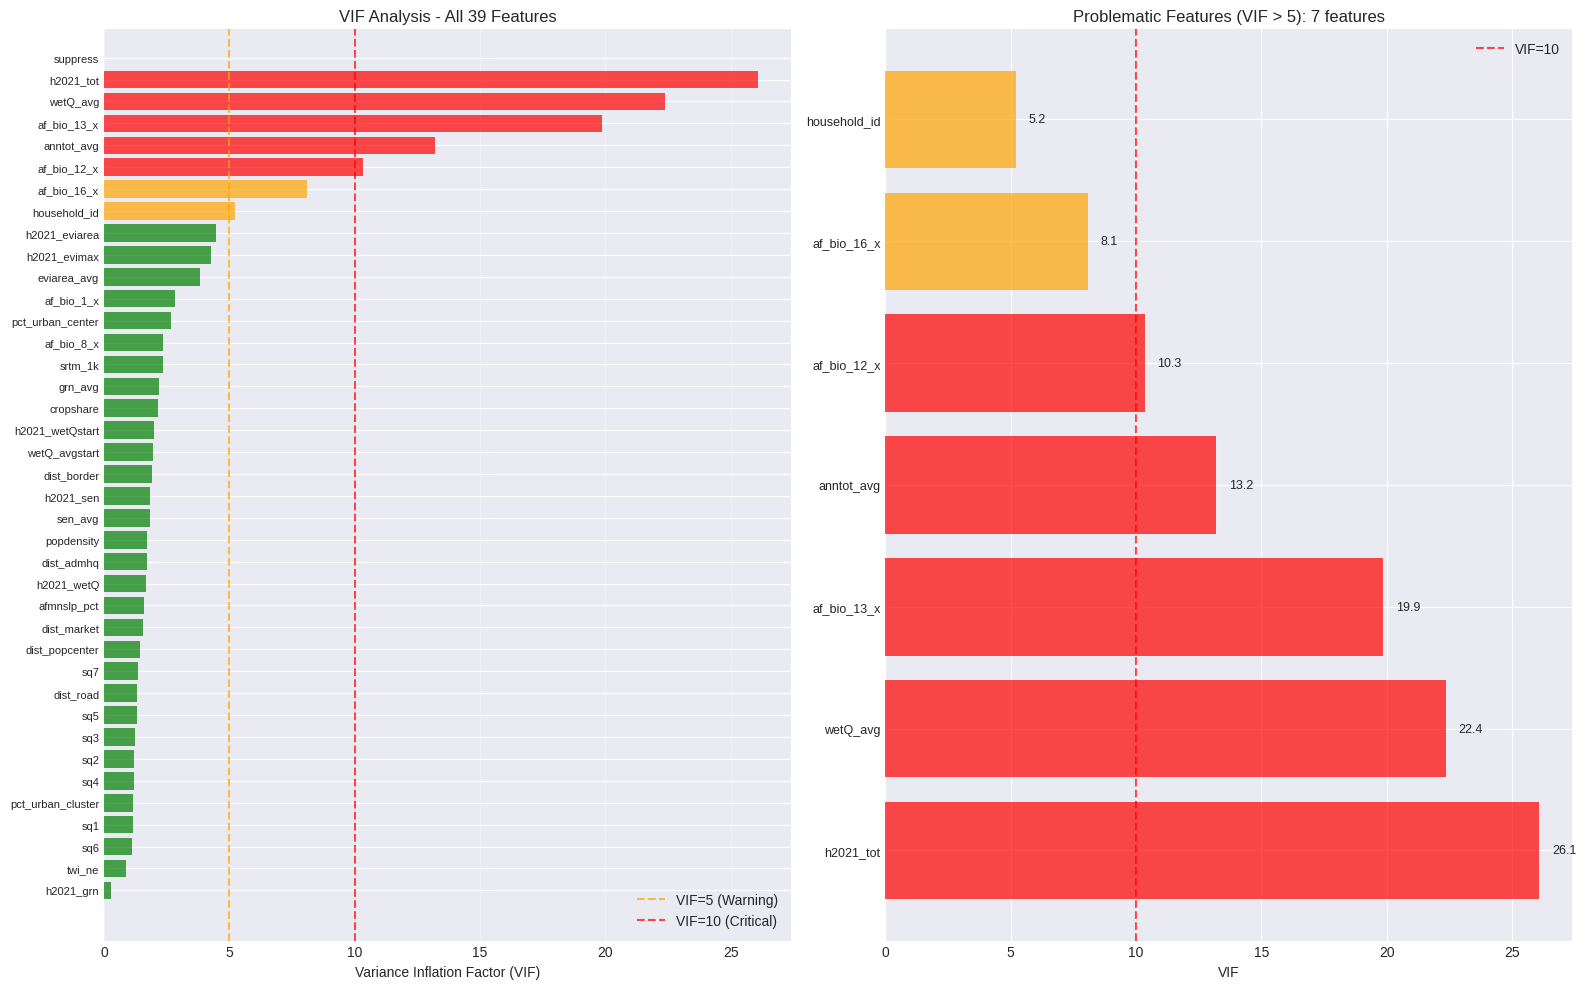


6. HIGHLY CORRELATED FEATURE PAIRS
----------------------------------------
Found 28 pairs with |correlation| > 0.8:
--------------------------------------------------------------------------------
Feature 1                      Feature 2                      Correlation 
--------------------------------------------------------------------------------
af_bio_1_x                     srtm_1k                              -0.985
evimax_avg                     h2021_evimax                          0.983
af_bio_13_x                    af_bio_16_x                           0.982
af_bio_1_x                     af_bio_8_x                            0.979
eviarea_avg                    h2021_eviarea                         0.963
af_bio_8_x                     srtm_1k                              -0.958
h2021_tot                      wetQ_avg                              0.947
sen_avg                        h2021_sen                             0.939
eviarea_avg                    evimax_avg    

In [32]:
# =============================================================================
# CORRELATION & VIF ANALYSIS - COMPLETE VERSION
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

print("\n" + "="*60)
print("COMPREHENSIVE CORRELATION AND VIF ANALYSIS")
print("="*60)

# =============================================================================
# 1. PREPARE DATA WITH ALL COLUMNS
# =============================================================================
print("\n1. PREPARING ALL DATA COLUMNS")
print("-"*40)

# Get ALL numerical columns from original dataframe
all_numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"Total numerical columns in df: {len(all_numerical_cols)}")

# Create DataFrame with ALL numerical columns + target
full_data = df[all_numerical_cols].copy()

# Make sure AI_pca1 is included (it's already in df from your preprocessing)
print(f"Including target column: evimax_avg")

# Display column count
print(f"\nAnalyzing {len(full_data.columns)} columns total:")

# =============================================================================
# 2. COMPREHENSIVE CORRELATION HEATMAP WITH NUMBERS
# =============================================================================
print("\n2. CORRELATION HEATMAP (WITH VALUES)")
print("-"*40)

# Calculate correlation matrix
corr_matrix = full_data.corr()

# Determine figure size based on number of columns
n_cols = len(corr_matrix.columns)
fig_width = max(20, n_cols * 0.7)
fig_height = max(18, n_cols * 0.6)

plt.figure(figsize=(fig_width, fig_height))

# Create heatmap with numbers
sns.heatmap(corr_matrix,
            cmap='RdBu_r',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            annot=True,  # Show numbers
            annot_kws={'size': 8},  # Font size for numbers
            fmt='.2f',  # Format numbers to 2 decimal places
            xticklabels=True,
            yticklabels=True)

plt.title(f'Complete Correlation Matrix ({n_cols} columns)', fontsize=16, pad=20)
plt.xticks(rotation=90, ha='center')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# =============================================================================
# 3. TARGET-SPECIFIC CORRELATION ANALYSIS
# =============================================================================
print("\n3. TARGET CORRELATION ANALYSIS")
print("-"*40)

# Find correlations with AI_pca1
if 'AI_pca1' in corr_matrix.columns:
    target_corrs = corr_matrix['evimax_avg'].drop('evimax_avg').sort_values(key=abs, ascending=False)

    print(f"\nTop 10 features correlated with evimax_avg:")
    print("-"*50)
    for i, (feat, corr) in enumerate(target_corrs.head(10).items(), 1):
        direction = "positive" if corr > 0 else "negative"
        print(f"{i:2}. {feat:30} : {corr:7.3f} ({direction})")

    # Plot top correlations
    plt.figure(figsize=(12, 8))
    top_20 = target_corrs.head(20)

    # Create color gradient
    colors = plt.cm.RdYlBu_r((top_20.values + 1) / 2)

    bars = plt.barh(range(len(top_20)), top_20.values, color=colors, alpha=0.8)
    plt.yticks(range(len(top_20)), top_20.index)
    plt.axvline(x=0, color='black', linewidth=0.8)
    plt.xlabel('Correlation Coefficient')
    plt.title('Top 20 Features Correlated with AI_pca1')
    plt.grid(axis='x', alpha=0.3, linestyle='--')

    # Add correlation values on bars
    for i, (bar, val) in enumerate(zip(bars, top_20.values)):
        x_pos = val + (0.02 if val >= 0 else -0.05)
        plt.text(x_pos, i, f'{val:.3f}', va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

# =============================================================================
# 4. VIF ANALYSIS FOR ALL NUMERICAL FEATURES
# =============================================================================
print("\n4. VIF ANALYSIS FOR ALL NUMERICAL FEATURES")
print("-"*40)

# Remove target column for VIF calculation (if present)
features_for_vif = [col for col in full_data.columns if col != 'evimax_avg']
X_for_vif = full_data[features_for_vif].copy()

print(f"Calculating VIF for {len(X_for_vif.columns)} features...")

# Calculate VIF
def calculate_vif_safe(X_df, max_features=50):
    """Calculate VIF safely handling large datasets"""
    if len(X_df.columns) > max_features:
        print(f"  Note: Calculating VIF for {len(X_df.columns)} features may take time...")

    X_const = add_constant(X_df)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X_const.columns

    vif_values = []
    for i in range(X_const.shape[1]):
        try:
            vif = variance_inflation_factor(X_const.values, i)
            vif_values.append(vif)
        except:
            vif_values.append(np.nan)

    vif_data["VIF"] = vif_values
    vif_data = vif_data[vif_data['feature'] != 'const']
    return vif_data.sort_values('VIF', ascending=False)

vif_results = calculate_vif_safe(X_for_vif)

print(f"\nVIF RESULTS SUMMARY:")
print("-"*60)
print(f"{'Feature':30} {'VIF':8} {'Status':12}")
print("-"*60)

# Display results with categorization
for _, row in vif_results.iterrows():
    vif_val = row['VIF']
    if pd.isna(vif_val):
        status = "ERROR"
        symbol = "?"
    elif vif_val > 10:
        status = "HIGH VIF"
        symbol = "🔴"
    elif vif_val > 5:
        status = "MODERATE"
        symbol = "🟡"
    else:
        status = "OK"
        symbol = "🟢"

    print(f"{symbol} {row['feature']:28} {vif_val:8.2f} {status:12}")

# =============================================================================
# 5. VIF VISUALIZATION
# =============================================================================
print("\n5. VIF VISUALIZATION")
print("-"*40)

fig, axes = plt.subplots(1, 2, figsize=(16, 10))

# Plot 1: All VIF values
vif_sorted = vif_results.sort_values('VIF')
axes[0].barh(range(len(vif_sorted)), vif_sorted['VIF'],
             color=['red' if v > 10 else 'orange' if v > 5 else 'green'
                    for v in vif_sorted['VIF']],
             alpha=0.7)
axes[0].set_yticks(range(len(vif_sorted)))
axes[0].set_yticklabels(vif_sorted['feature'], fontsize=8)
axes[0].axvline(x=5, color='orange', linestyle='--', alpha=0.7, label='VIF=5 (Warning)')
axes[0].axvline(x=10, color='red', linestyle='--', alpha=0.7, label='VIF=10 (Critical)')
axes[0].set_xlabel('Variance Inflation Factor (VIF)')
axes[0].set_title(f'VIF Analysis - All {len(vif_sorted)} Features')
axes[0].legend()
axes[0].grid(axis='x', alpha=0.3)

# Plot 2: Problematic features only
problematic = vif_results[vif_results['VIF'] > 5]
if len(problematic) > 0:
    axes[1].barh(range(len(problematic)), problematic['VIF'],
                 color=['red' if v > 10 else 'orange' for v in problematic['VIF']],
                 alpha=0.7)
    axes[1].set_yticks(range(len(problematic)))
    axes[1].set_yticklabels(problematic['feature'], fontsize=9)
    axes[1].axvline(x=10, color='red', linestyle='--', alpha=0.7, label='VIF=10')
    axes[1].set_xlabel('VIF')
    axes[1].set_title(f'Problematic Features (VIF > 5): {len(problematic)} features')
    axes[1].legend()

    # Add VIF values on bars
    for i, (_, row) in enumerate(problematic.iterrows()):
        axes[1].text(row['VIF'] + 0.5, i, f'{row["VIF"]:.1f}',
                    va='center', fontsize=9)
else:
    axes[1].text(0.5, 0.5, 'No VIF issues!\nAll features have VIF < 5',
                ha='center', va='center', transform=axes[1].transAxes,
                fontsize=14, color='green')
    axes[1].set_title('No Multicollinearity Issues')

plt.tight_layout()
plt.show()

# =============================================================================
# 6. HIGHLY CORRELATED FEATURE PAIRS
# =============================================================================
print("\n6. HIGHLY CORRELATED FEATURE PAIRS")
print("-"*40)

threshold = 0.8
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > threshold:
            feat1, feat2 = corr_matrix.columns[i], corr_matrix.columns[j]
            high_corr_pairs.append((feat1, feat2, corr_val))

if high_corr_pairs:
    print(f"Found {len(high_corr_pairs)} pairs with |correlation| > {threshold}:")
    print("-"*80)
    print(f"{'Feature 1':30} {'Feature 2':30} {'Correlation':12}")
    print("-"*80)

    for feat1, feat2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
        print(f"{feat1:30} {feat2:30} {corr:12.3f}")
else:
    print(f"No feature pairs found with |correlation| > {threshold}")

# =============================================================================
# 7. COMPREHENSIVE SUMMARY
# =============================================================================
print("\n" + "="*60)
print("COMPREHENSIVE ANALYSIS SUMMARY")
print("="*60)

# Summary statistics
high_vif = vif_results[vif_results['VIF'] > 10]
moderate_vif = vif_results[(vif_results['VIF'] > 5) & (vif_results['VIF'] <= 10)]

print(f"\n📊 SUMMARY STATISTICS:")
print(f"  • Total columns analyzed: {len(full_data.columns)}")
print(f"  • Features with HIGH VIF (>10): {len(high_vif)}")
print(f"  • Features with MODERATE VIF (5-10): {len(moderate_vif)}")
print(f"  • Highly correlated pairs (|r| > 0.8): {len(high_corr_pairs)}")
print(f"  • Maximum VIF: {vif_results['VIF'].max():.2f}")
print(f"  • Average VIF: {vif_results['VIF'].mean():.2f}")

# Top correlations with target
if 'AI_pca1' in corr_matrix.columns:
    top_target_corr = target_corrs.head(3)
    print(f"\n🎯 TOP FEATURES FOR TARGET PREDICTION:")
    for feat, corr in top_target_corr.items():
        vif_val = vif_results[vif_results['feature'] == feat]['VIF'].values[0] if feat in vif_results['feature'].values else np.nan
        print(f"  • {feat}: correlation = {corr:.3f}, VIF = {vif_val:.2f}")

# Recommendations
print(f"\n⚠️  RECOMMENDATIONS:")
if len(high_vif) > 0:
    print(f"  1. Consider removing features with VIF > 10:")
    for _, row in high_vif.head(5).iterrows():
        print(f"     - {row['feature']} (VIF = {row['VIF']:.1f})")
if len(high_corr_pairs) > 0:
    print(f"  2. Check these highly correlated pairs for redundancy")
if len(high_vif) == 0 and len(high_corr_pairs) == 0:
    print("  ✓ No major multicollinearity issues detected!")

print("\n" + "="*60)
print("ANALYSIS COMPLETE")
print("="*60)

# Store results for later use
analysis_results = {
    'correlation_matrix': corr_matrix,
    'vif_results': vif_results,
    'high_correlation_pairs': high_corr_pairs,
    'target_correlations': target_corrs if 'AI_pca1' in corr_matrix.columns else None
}

print("\nResults stored in 'analysis_results' dictionary")

In [34]:
# ==============================
# 2. Check columns
# ==============================
print("Before Encoding:")
print(df[['ssa_aez09','landcov']].head())

# ==============================
# 4. One-Hot Encode categorical columns
# ==============================
df_encoded = pd.get_dummies(
    df,
    columns=['ssa_aez09', 'landcov'],
    drop_first=True   # avoids multicollinearity (important for regression)
)

# ==============================
# 5. View results
# ==============================
print("\nAfter Encoding:")
print(df_encoded.head())

print("\nNew columns created:")
new_cols = [col for col in df_encoded.columns if 'ssa_aez09_' in col or 'landcov_' in col]
print(new_cols)

# ==============================
# 6. Check dataset shape
# ==============================
print("\nOriginal shape:", df.shape)
print("Encoded shape:", df_encoded.shape)

# change to boolean to numerical value
#bool_cols = df_encoded.select_dtypes(include='bool').columns
#df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)
df=df_encoded.copy()

Before Encoding:


KeyError: "None of [Index(['ssa_aez09', 'landcov'], dtype='object')] are in the [columns]"

In [35]:
# ------------------------------
# FULL PREPROCESSING PIPELINE WITH SMOTE (NO WARNINGS)
# ------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
# ------------------------------
# Step 1: Drop irrelevant/correlated columns
# ------------------------------

cols_to_drop = [
    'h2021_eviarea',
     'h2021_evimax','eviarea_avg',
    'h2021_tot','suppress','af_bio_13_x','wetQ_avg'
]
df = df.drop(columns=cols_to_drop, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4890 entries, 0 to 4889
Data columns (total 47 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   household_id                                4890 non-null   int64  
 1   dist_road                                   4890 non-null   float64
 2   dist_market                                 4890 non-null   float64
 3   dist_border                                 4890 non-null   float64
 4   dist_popcenter                              4890 non-null   float64
 5   dist_admhq                                  4890 non-null   float64
 6   af_bio_1_x                                  4890 non-null   int64  
 7   af_bio_8_x                                  4890 non-null   int64  
 8   af_bio_12_x                                 4890 non-null   int64  
 9   af_bio_16_x                                 4890 non-null   int64  
 10  afmnslp_pct 

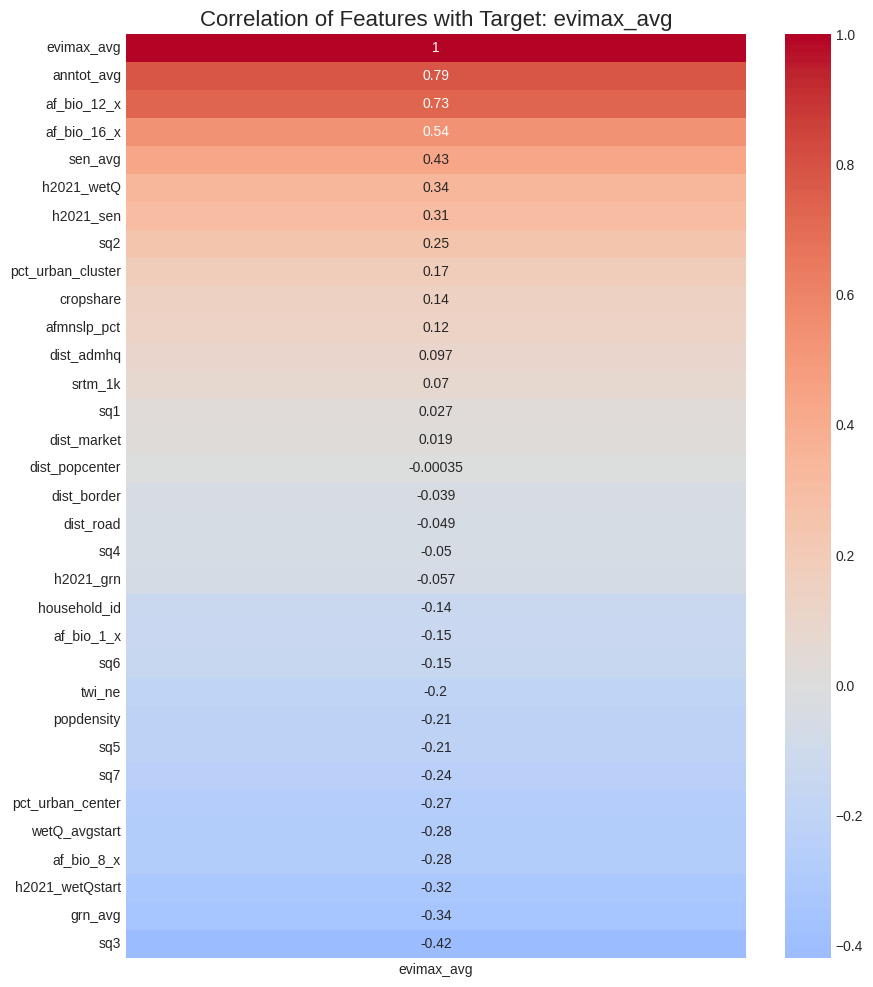

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your dataset with renamed columns

# Step 1: Choose target column
target = 'evimax_avg'

# Step 2: Select numeric columns only
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Step 3: Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Step 4: Focus on correlations with target
target_corr = corr_matrix[[target]].sort_values(by=target, ascending=False)

# Step 5: Plot heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', center=0)
plt.title(f'Correlation of Features with Target: {target}', fontsize=16)
plt.show()

In [37]:
# ===============================
# Define targets
# ===============================
y_reg = df['evimax_avg']                     # regression

# ===============================
# Define features (remove targets)
# ===============================
X = df.drop(columns=['evimax_avg'])

bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

# Store original feature names before PCA
original_feature_names = X.columns.tolist()

In [ ]:
# This cell previously contained PCA logic, but it's being commented out
# to ensure the model is trained on original features for feature importance calculation.

In [ ]:
# This cell previously contained PCA logic, but it's being commented out
# to ensure the model is trained on original features for feature importance calculation.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# X here should now contain the original features, as PCA did not overwrite it.
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

scaler = StandardScaler()

X_train_r = scaler.fit_transform(X_train_r)
X_test_r  = scaler.transform(X_test_r)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# X here should now contain the original features, as PCA did not overwrite it.
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

scaler = StandardScaler()

X_train_r = scaler.fit_transform(X_train_r)
X_test_r  = scaler.transform(X_test_r)

MODEL COMPARISON
Training 5 models...

RESULTS
           Model  RMSE_Train  RMSE_Test  R2_Train  R2_Test
         XGBoost      0.0004     0.0020     1.000   0.9996
        LightGBM      0.0005     0.0023     1.000   0.9994
    RandomForest      0.0007     0.0025     1.000   0.9994
LinearRegression      0.0276     0.0287     0.922   0.9142
           Ridge      0.0276     0.0287     0.922   0.9140

Best: XGBoost    R² = 0.9996    RMSE = 0.0020

Plots...


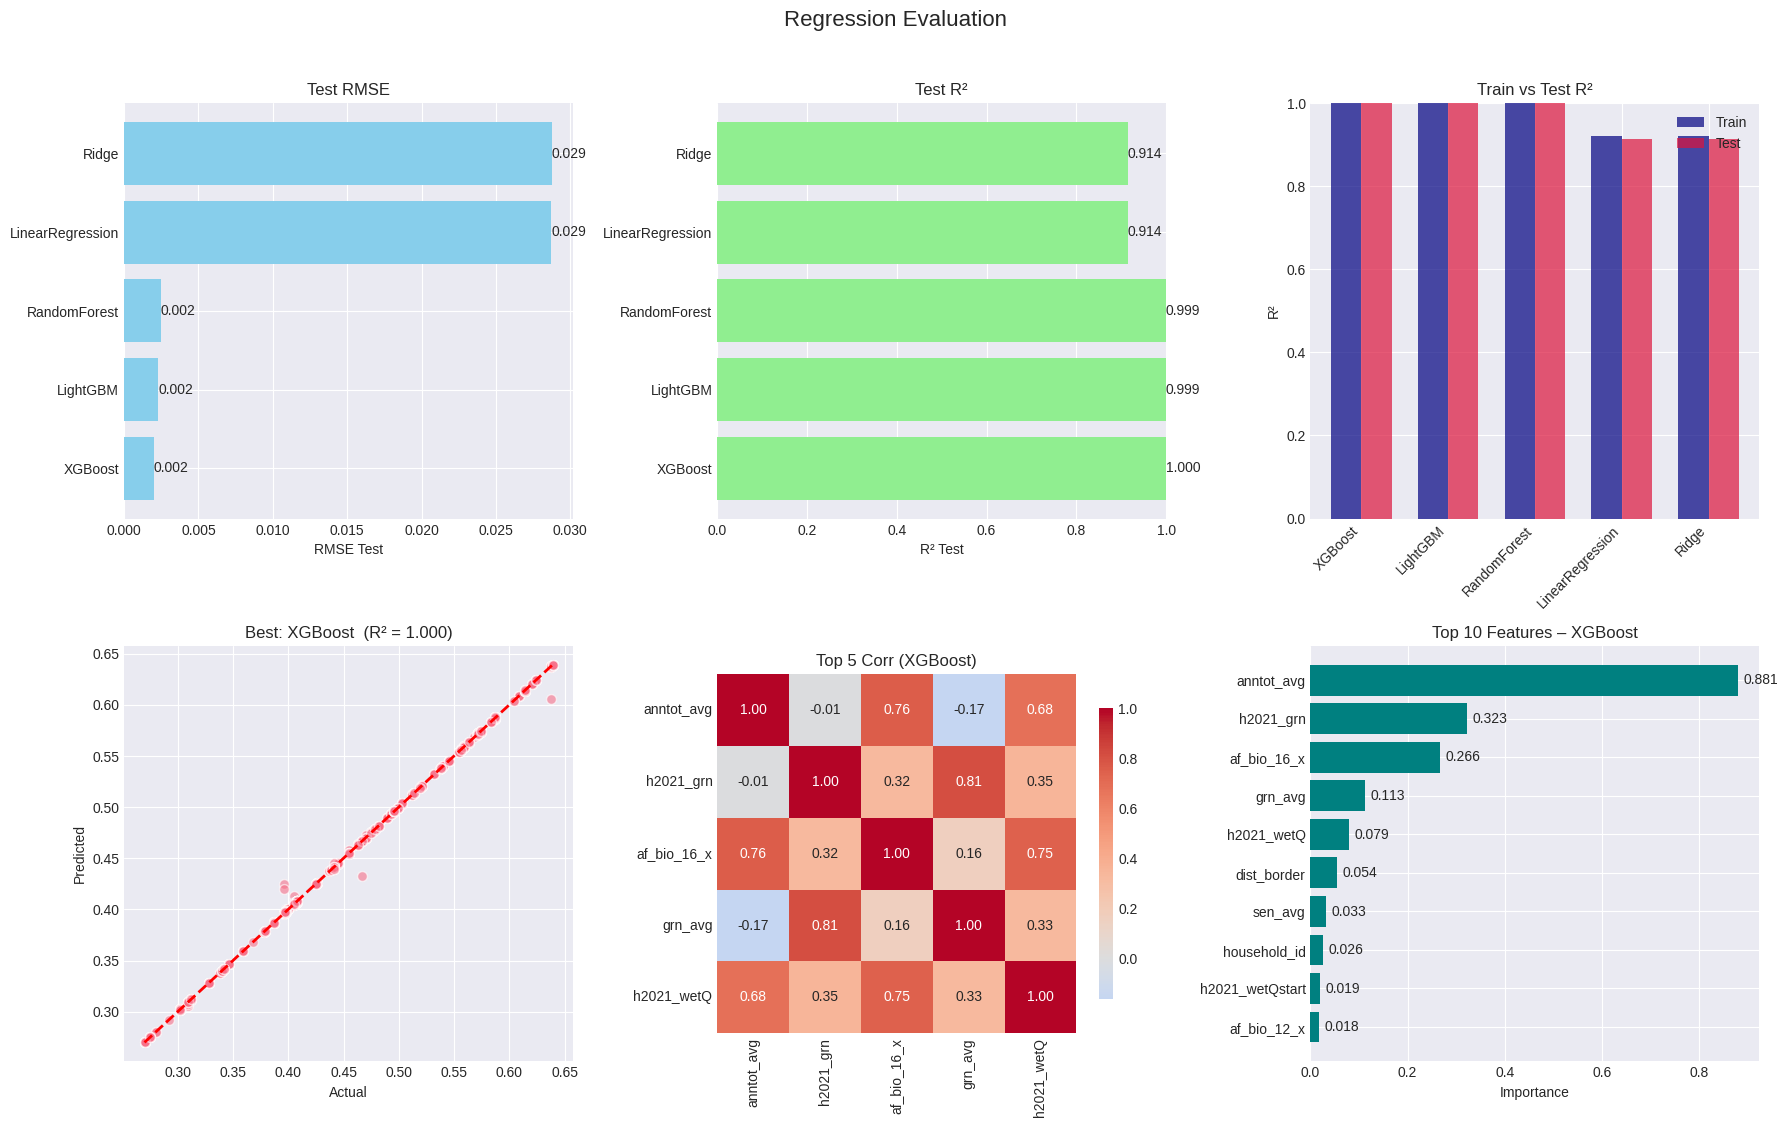


Feature Importance:


,feature,importance,std
26,anntot_avg,0.8808,0.0436
30,h2021_grn,0.3232,0.0130
9,af_bio_16_x,0.2661,0.0142
28,grn_avg,0.1126,0.0153
25,h2021_wetQ,0.0789,0.0045
3,dist_border,0.0540,0.0031
29,sen_avg,0.0326,0.0024
0,household_id,0.0258,0.0034
24,h2021_wetQstart,0.0186,0.0016
8,af_bio_12_x,0.0184,0.0013


In [40]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

try:
    from xgboost import XGBRegressor
    xgb_available = True
except:
    xgb_available = False

try:
    from lightgbm import LGBMRegressor
    lgb_available = True
except:
    lgb_available = False

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

def get_models():
    models = {
        "LinearRegression": LinearRegression(),
        "Ridge": Ridge(alpha=1.0),
        "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42, min_samples_split=5)
    }
    if xgb_available:
        models["XGBoost"] = XGBRegressor(n_estimators=200, random_state=42, learning_rate=0.1, verbosity=0)
    if lgb_available:
        models["LightGBM"] = LGBMRegressor(n_estimators=200, random_state=42, learning_rate=0.1, verbose=-1)
    return models

def evaluate_models(models, X_train, X_test, y_train, y_test):
    results, fitted, preds = [], {}, {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test  = model.predict(X_test)
        preds[name] = y_pred_test
        results.append({
            "Model": name,
            "RMSE_Train": math.sqrt(mean_squared_error(y_train, y_pred_train)),
            "RMSE_Test":  math.sqrt(mean_squared_error(y_test,  y_pred_test)),
            "R2_Train": r2_score(y_train, y_pred_train),
            "R2_Test":  r2_score(y_test,  y_pred_test)
        })
        fitted[name] = model
    return pd.DataFrame(results).sort_values("RMSE_Test"), fitted, preds

def plot_enhanced_results(results_df, y_test, predictions, feature_names, best_model, X_test):
    if X_test.shape[1] != len(feature_names):
        raise ValueError(f"Feature names length ({len(feature_names)}) does not match X_test columns ({X_test.shape[1]})")

    fig = plt.figure(figsize=(18, 11))

    ax1 = plt.subplot(2, 3, 1)
    bars = ax1.barh(results_df['Model'], results_df['RMSE_Test'], color='skyblue')
    ax1.bar_label(bars, fmt='%.3f')
    ax1.set_xlabel('RMSE Test')
    ax1.set_title('Test RMSE')

    ax2 = plt.subplot(2, 3, 2)
    bars = ax2.barh(results_df['Model'], results_df['R2_Test'], color='lightgreen')
    ax2.bar_label(bars, fmt='%.3f')
    ax2.set_xlabel('R² Test')
    ax2.set_title('Test R²')
    ax2.set_xlim(0, 1)

    ax3 = plt.subplot(2, 3, 3)
    x = np.arange(len(results_df))
    width = 0.35
    ax3.bar(x - width/2, results_df['R2_Train'], width, label='Train', alpha=0.7, color='navy')
    ax3.bar(x + width/2, results_df['R2_Test'], width, label='Test', alpha=0.7, color='crimson')
    ax3.set_xticks(x)
    ax3.set_xticklabels(results_df['Model'], rotation=45, ha='right')
    ax3.set_ylabel('R²')
    ax3.set_title('Train vs Test R²')
    ax3.legend()
    ax3.set_ylim(0, 1)

    best_name = results_df.iloc[0]['Model']
    best_r2   = results_df.iloc[0]['R2_Test']

    ax4 = plt.subplot(2, 3, 4)
    ax4.scatter(y_test, predictions[best_name], alpha=0.6, edgecolors='w', s=50)
    ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    ax4.set_xlabel('Actual')
    ax4.set_ylabel('Predicted')
    ax4.set_title(f'Best: {best_name}  (R² = {best_r2:.3f})')

    # Permutation importance
    perm = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)
    imp_df = pd.DataFrame({
        'feature': feature_names,
        'importance': perm.importances_mean,
        'std': perm.importances_std
    }).sort_values('importance', ascending=False)

    top_5 = imp_df.head(5)['feature'].tolist()

    ax5 = plt.subplot(2, 3, 5)
    # X_test needs to be a DataFrame with column names for heatmap to work correctly with feature names
    X_test_df = pd.DataFrame(X_test, columns=feature_names)
    sns.heatmap(X_test_df[top_5].corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0,
                square=True, ax=ax5, cbar_kws={"shrink": 0.7})
    ax5.set_title(f'Top 5 Corr ({best_name})')

    ax6 = plt.subplot(2, 3, 6)
    top_10 = imp_df.head(10).sort_values('importance')
    bars = ax6.barh(top_10['feature'], top_10['importance'], color='teal')
    ax6.bar_label(bars, fmt='%.3f', padding=4)
    ax6.set_xlabel('Importance')
    ax6.set_title(f'Top 10 Features – {best_name}')

    plt.suptitle('Regression Evaluation', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

    return imp_df

def print_feature_importance_table(imp_df):
    try:
        from IPython.display import display
        display(imp_df.head(15).style.background_gradient(subset=['importance'], cmap='YlOrRd').format({'importance':'{:.4f}', 'std':'{:.4f}'}))
    except:
        print(imp_df.head(15).round(4))

def run_analysis(X_train, X_test, y_train, y_test, feature_names):
    print("="*60)
    print("MODEL COMPARISON")
    print("="*60)

    models = get_models()
    print(f"Training {len(models)} models...")

    results_df, fitted_models, predictions = evaluate_models(models, X_train, X_test, y_train, y_test)

    print("\n" + "="*60)
    print("RESULTS")
    print(results_df.round(4).to_string(index=False))

    best_name = results_df.iloc[0]['Model']
    print(f"\nBest: {best_name}    R² = {results_df.iloc[0]['R2_Test']:.4f}    RMSE = {results_df.iloc[0]['RMSE_Test']:.4f}")

    print("\nPlots...")
    imp_df = plot_enhanced_results(results_df, y_test, predictions, feature_names, fitted_models[best_name], X_test)

    print("\nFeature Importance:")
    print_feature_importance_table(imp_df)

    return results_df, fitted_models, predictions, imp_df

# ────────────────────────────────────────────────
#  Correct usage – must match column count!
# ────────────────────────────────────────────────

# Example – replace with YOUR real column names
# len(real_feature_names) MUST == X_train_r.shape[1]

# For feature importance on original names, we use original_feature_names

results, fitted, preds, fi = run_analysis(
     X_train_r, X_test_r, y_train_r, y_test_r,
     feature_names=original_feature_names
 )